In [1]:
import dicom
import numpy as np
import os
from PIL import Image
import shutil
import scipy.misc
import random
from matplotlib import pyplot as plt
import SimpleITK as sitk
import json
from torchvision import transforms as T
from torchvision.transforms import functional as F
os.environ['CUDA_VISIBLE_DEVICES'] = '2'
import pandas as pd
import glob
import csv
def rm_mkdir(dir_path):
    if os.path.exists(dir_path):
        shutil.rmtree(dir_path)
        print('Remove path - %s'%dir_path)
    os.makedirs(dir_path)
    print('Create path - %s'%dir_path)
def convertImage(raw):
    img = np.array(raw)
    img[img>255] = 255
    mean = np.mean(img)
    min_img = np.min(img)
    if min_img<-1500:
        min_img = min_img*(1.0/2.0)
    #print(mean, min_img)
    
    img = img - mean
    img = img*1.0 + mean*(mean/min_img)*1.1#修对比度和亮度
    img = img/np.max(img)
    #img[img>255] = 255
    img[img<0] = 0
    return img

/work/dependence/anaconda3/envs/py36/lib/python3.6/site-packages/dicom/__init__.py:53: UserWarning: 
This code is using an older version of pydicom, which is no longer 
maintained as of Jan 2017.  You can access the new pydicom features and API 
by installing `pydicom` from PyPI.
See 'Transitioning to pydicom 1.x' section at pydicom.readthedocs.org 
for more information.

  warnings.warn(msg)


In [28]:
num = 98

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


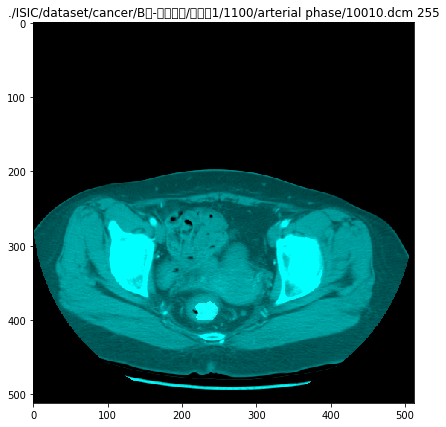

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


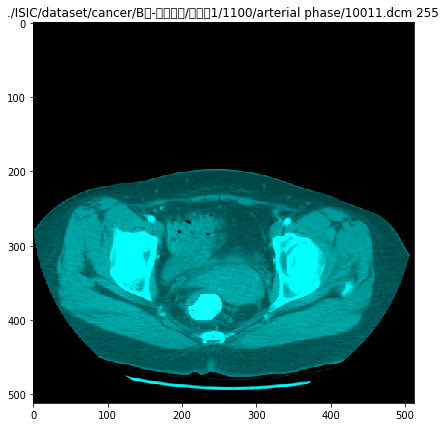

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


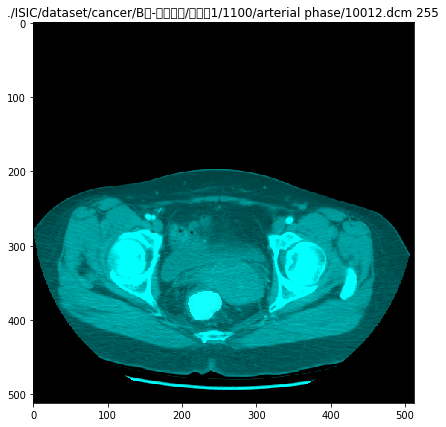

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


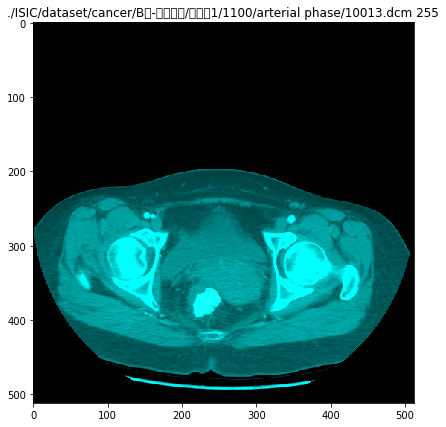

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


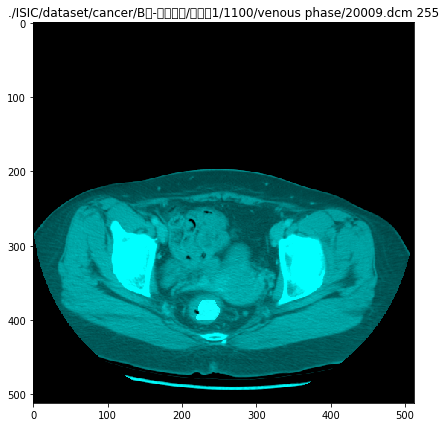

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


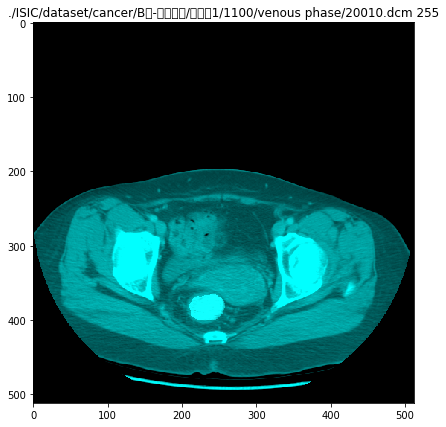

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


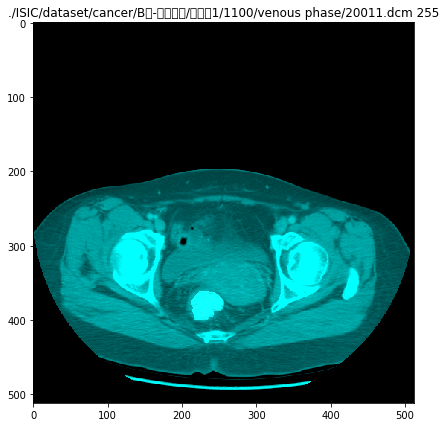

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


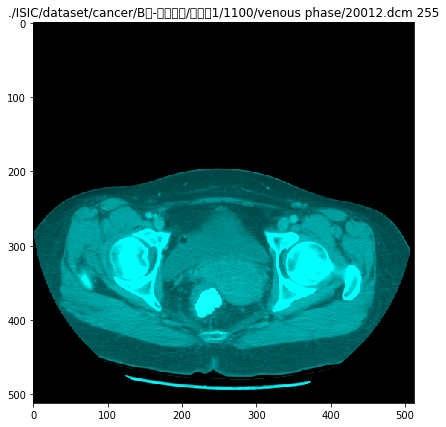

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


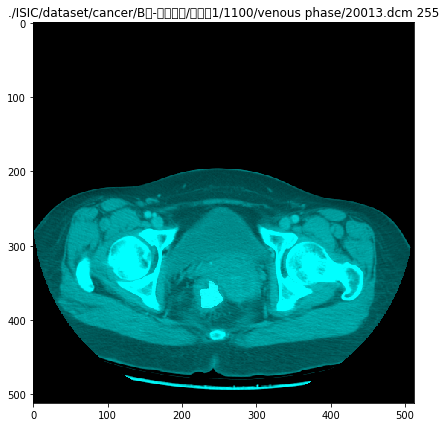

In [29]:

patients = os.listdir('./ISIC/dataset/cancer/B题-全部数据/数据集1/')
for patient in patients[(num):(num+1)]:
    lis = glob.glob(os.path.join('./ISIC/dataset/cancer/B题-全部数据/数据集1/'+patient+'/arterial phase','*.dcm'))
    for i in lis:
        image = sitk.ReadImage(i)
        image_array = sitk.GetArrayFromImage(image)
        mask_image = Image.open(i[:-4]+'_mask.png')
        mask_image = np.array(mask_image)

        #print(np.max(mask_image))
        if np.max(mask_image)>0:
            plt.figure(figsize=(7,7))
            img_t = 0.3*(mask_image/255.)*convertImage(image_array)[0,:,:]+convertImage(image_array)[0,:,:]
            tmp_zeros = np.zeros(shape=(512,512,3))
            tmp_zeros[:,:,0] = 0.1*(mask_image/255.)*convertImage(image_array)[0,:,:] #+ 2.0*convertImage(image_array)[0,:,:]
            tmp_zeros[:,:,1] = 0.5*(mask_image/255.)*convertImage(image_array)[0,:,:] + convertImage(image_array)[0,:,:]
            tmp_zeros[:,:,2] = 0.5*(mask_image/255.)*convertImage(image_array)[0,:,:] + convertImage(image_array)[0,:,:]
            plt.title(label=i+' '+str(np.max(mask_image)))
            plt.imshow(tmp_zeros)
            plt.show()
for patient in patients[(num):(num+1)]:
    lis = glob.glob(os.path.join('./ISIC/dataset/cancer/B题-全部数据/数据集1/'+patient+'/venous phase','*.dcm'))
    for i in lis:
        image = sitk.ReadImage(i)
        image_array = sitk.GetArrayFromImage(image)
        mask_image = Image.open(i[:-4]+'_mask.png')
        mask_image = np.array(mask_image)

        #print(np.max(mask_image))
        if np.max(mask_image)>0:
            plt.figure(figsize=(7,7))
            img_t = 0.3*(mask_image/255.)*convertImage(image_array)[0,:,:]+convertImage(image_array)[0,:,:]
            tmp_zeros = np.zeros(shape=(512,512,3))
            tmp_zeros[:,:,0] = 0.1*(mask_image/255.)*convertImage(image_array)[0,:,:] #+ 2.0*convertImage(image_array)[0,:,:]
            tmp_zeros[:,:,1] = 0.5*(mask_image/255.)*convertImage(image_array)[0,:,:] + convertImage(image_array)[0,:,:]
            tmp_zeros[:,:,2] = 0.5*(mask_image/255.)*convertImage(image_array)[0,:,:] + convertImage(image_array)[0,:,:]
            plt.title(label=i+' '+str(np.max(mask_image)))
            plt.imshow(tmp_zeros)
            plt.show()